In [ ]:
import random
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

Agent_upper_limit = 10                                                                    #エージェント数の上限
Trials = 10000                                                                            #試行回数

xt_net = [30,30,30,30,30,30,30,30,30,30]                                                  #各エージェントの選択
lamda_net = [0 for i in range(Agent_upper_limit)]                                         #ラグランジュ乗数の設定
wt_net = [0 for i in range(Agent_upper_limit)]                                            #合意制御で用いる
J_min_data = [0 for i in range(Agent_upper_limit)]                                        #リグレットのとき使用
l_net = [4,6,8,10,11,13,14,15,16,17]                                                      #主問題の制約条件のパラメータ
xt_hat_net = [[10 for i in range(Agent_upper_limit)]for j in range(Agent_upper_limit)]    #合意制御で用いる


xt = [0 for i in range(Agent_upper_limit)]
lamda = [0 for i in range(Agent_upper_limit)]
wt = [0 for i in range(Agent_upper_limit)]
J_min = [0 for i in range(Agent_upper_limit)]
xt_hat = [[0 for i in range(Agent_upper_limit)] for j in range(Agent_upper_limit) ]

In [ ]:
def def_Agnet_amount():
  global Agent
  global switch
  Agent = 4                                                                               #最低エージェント数
  switch = [1,1,1,1,0,0,0,0,0,0]                                                          ##エージェントxの接続状況を表す配列

  for num in range(4,10):
    x = random.randint(0,1)
    if x == 1:
      switch[num] = 1
      Agent += 1

  return Agent



def generate(xt_net,lamda_net,wt_net,J_min_data,xt_hat_net,l_net):
  Agent = def_Agnet_amount()
  for num1 in range(Agent_upper_limit):
   if switch[num1] == 1:

     xt[num1] = xt_net[num1]
     lamda[num1] = lamda_net[num1]
     J_min[num1] = J_min_data[num1]
     wt[num1] = wt_net[num1]
     num2 = 0
     for num2 in range(Agent_upper_limit):
       if switch[num2] == 1:
         xt_hat[num1][num2] = xt_hat_net[num1][num2]
   else:
     lamda_net[num1] = 0

generate(xt_net,lamda_net,wt_net,J_min_data,xt_hat_net,l_net)
print('Agent=')
print(Agent)

Agent=
9


In [ ]:
def Atmaker(Agent):
  global At
  x = 0
  At = [[0 for i in range(Agent)] for j in range(Agent)]
  gyoukaku = [0 for i in range(Agent)]

  for num1 in range(Agent):
    for num2 in range(Agent):

      if num1 != num2:
        x = random.randint(1,5)
        At[num2][num1] = 0.01 * x
        gyoukaku[num1] += 0.01 * x

  for num1 in range(Agent):
     At[num1][num1] = 1.00 - gyoukaku[num1]


In [ ]:
def new_x_hat(i,xt,At,Agent,xt_hat):
  xt1_hat = [[0 for j in range(Agent)] for k in range(Agent) ]
  xt_hat_tmp = [[0 for j in range(Agent)] for k in range(Agent) ]
  i_tmp = 0
  for num in range(i):
     if switch[num] == 1:
       i_tmp += 1
  n = 0
  for l in range(Agent_upper_limit):
     if switch[l] == 1:
        xt_hat_tmp[i_tmp][n] = xt_hat[i][l]
        n += 1


  l = j = 0
  for l in range(Agent):
    if i_tmp == l:
      xt1_hat[i_tmp][l] = xt[i]
    else:
      for j in range(Agent):
        xt1_hat[i_tmp][l] += At[i_tmp][j]*xt_hat_tmp[j][l]

  num1 = num2 = 0
  for num1 in range(Agent_upper_limit):
    if switch[num1] == 1:
      xt_hat[i][num1] = xt1_hat[i_tmp][num2]
      num2 += 1


In [ ]:
def w_it(lamda,wt,i):
  w_esti = 0
  j = k = num1 = agent_num_1  = agent_num_2 = 0

  for j in range(i):
    if switch[j] == 1:
      agent_num_1 += 1

  for k in range(Agent_upper_limit):
      if switch[k] == 1:
        num1 = agent_num_2 = 0
        for num2 in range(k):
          if switch[num2] == 1:
            agent_num_2 += 1
        w_esti += At[agent_num_1][agent_num_2]*lamda[k]

  wt[i] = w_esti

#テスト
for i in range(Agent_upper_limit):

  print("変更前")
  print(wt[i])
  print('\n')
  if switch[i] == 1:
    w_it(lamda,wt,i)

  print("変更後")
  print(wt[i])
  print('\n')



変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0


変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0.0


変更前
0


変更後
0.0




In [ ]:
def g(xt,i,t,l_net):
  result_gi = xt[i] - l_net[i]
  return result_gi

result_git = 0
for i in range(Agent_upper_limit):
  if switch[i] == 1:
    result_git += g(xt,i,0,l_net)
  else:
    result_git += 0

In [ ]:
def nash_cost_Func(i,t,xit,nash_x):#時刻tにおけるエージェントiのナッシュ均衡値におけるコスト関数値
  xt_sum = 0
  num1 = 0
  for num1 in range(Agent_upper_limit):
    if switch[num1] == 1:
      if num1 == i:
        xt_sum += xit
      else:
        xt_sum += nash_x[num1]

  Ji = beta(t,i)*xit-xit*(gamma(t,i)-xt_sum)
  return Ji

In [ ]:
beta = lambda t, i: (i+1)*abs(math.sin(t/12))+0.4*(10-i)
gamma = lambda t, i: 5*(i+1)-0.5*(i+1)*math.sin(t/12)
alpha_0 = 0.02
sigma_0 = 0.01
alpha_rate = 0.48
beta_rate = 0.24
new_lamda = 0
def syadoux(x):
  if x < 0:
    x = 0
  elif x > 30:
    x = 30

  return x


def regene_x(xt,lamda,xt_hat,t,i):
   if t == 0:
     alpha = alpha_0
   else:
     alpha = alpha_0 / float(pow(t,alpha_rate))

   del_J = [0 for i in range(Agent_upper_limit)]
   del_g = [0 for i in range(Agent_upper_limit)]

   sum_xj = 0
   for j in range(Agent_upper_limit):
     if switch[j] == 1:
        sum_xj += xt_hat[i][j]

   del_J[i] = beta(t,i) - gamma(t,i) + sum_xj + xt[i]
   del_g[i] = 1

   tmp_x = xt[i]- del_J[i] - del_g[i]*lamda[i]
   tmp_x = syadoux(tmp_x)
   xt1 = (1 - alpha)*xt[i] + alpha*tmp_x

   xt[i] = xt1

   return xt1

#テスト
for i in range(Agent_upper_limit):

  print("変更前")
  print(xt[i])
  print('\n')
  if switch[i] == 1:
    new_xt = regene_x(xt,lamda,xt_hat,1,i)

  print("変更後")
  print(xt[i])
  print('\n')


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
0


変更後
0


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
30


変更後
29.4


変更前
30


変更後
29.4




In [ ]:
for i in range(Agent_upper_limit):
  if switch[i] == 1:
    w_it(lamda,wt,i)

def renew_lamda(xt,t,i):
  global lamda_hat
  if t == 0:
     alpha = alpha_0
     sigma = sigma_0
  else:
     alpha = alpha_0/float(pow(t,alpha_rate))
     sigma = sigma_0/float(pow(t,beta_rate))
  lamda_tmp = 0
  lamda_hat = 0

  if switch[i] == 1:
     gt = g(xt,i,t,l_net)
  else:
     gt = 0

  lamda_tmp = wt[i] + alpha*(gt - sigma*wt[i])

  if lamda_tmp <= 0:
    lamda_hat = 0
  else :
    lamda_hat = lamda_tmp

  lamda[i] = lamda_hat
  return lamda_hat

#テスト
for i in range(Agent_upper_limit):

  print("変更前")
  print(lamda[i])
  print('\n')

  if switch[i] == 1:
    new_lamda = renew_lamda(xt,1,i)

  lamda[i]=new_lamda
  print("変更後")
  print(lamda[i])
  print('\n')

変更前
0


変更後
0.508


変更前
0


変更後
0.46799999999999997


変更前
0


変更後
0.428


変更前
0


変更後
0.38799999999999996


変更前
0


変更後
0.38799999999999996


変更前
0


変更後
0.32799999999999996


変更前
0


変更後
0.308


変更前
0


変更後
0.288


変更前
0


変更後
0.26799999999999996


変更前
0


変更後
0.24799999999999997




In [ ]:
learning_rate = lambda k, a, i: 0.001/pow(k+1,a)
max_iterations = 1000
tolerance = 0.1

# エージェントiのコスト関数のナブラ
def cost_gradient(t, i, x):
    xt_sum = 0
    for num1 in range(Agent_upper_limit):
      if switch[num1] == 1:
        xt_sum += x[num1]
    grad = beta(t, i) - (gamma(t, i) - xt_sum - x[i])
    return grad

global nash_x
nash_x = [0 for i in range(Agent_upper_limit)]

def nash_ans(xt,t_t):
  x = [0 for i in range(Agent_upper_limit)]
  x_old = [0 for i in range(Agent_upper_limit)]
  for i in range(Agent_upper_limit):
    x[i] = xt[i]

  i = k = 0
  for num1 in range(Agent_upper_limit):
      x_old[num1] = x[num1]
  for i in range(Agent_upper_limit):
      if switch[i] == 1:
        while True:
            x[i] = max(0, min(30, x[i] - learning_rate(k,0.9,i) * cost_gradient(t_t, i, x)  ))

            if abs(x[i] - x_old[i]) < tolerance:

              break
            x_old[i] = x[i]
            k += 1
  for i in range(Agent_upper_limit):
      if switch[i] == 1:
        nash_x[i] = x[i]

ストリーミング出力は最後の 5000 行に切り捨てられました。
10.109909533984315


各iにおける変更前のxt
16.886060148636016


各iにおける変更後のxt
16.886060148636016


各iにおける変更前のxt
13.406023730466364


各iにおける変更後のxt
13.405083267509786


各iにおける変更前のxt
14.46174312890662


各iにおける変更後のxt
14.46174312890662


各iにおける変更前のxt
18.14646460136002


各iにおける変更後のxt
18.14646460136002


各iにおける変更前のxt
20.686690559300672


各iにおける変更後のxt
20.685060579446937


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
0.8689991535874232


各iにおける変更後のlamda
0.8689991535874232


各iにおける変更前のlamda
0


各iにおける変更後のlamda
0


各iにおける変更前のlamda
2.8978467135059796


各iにおける変更後のlamda
2.8978467135059796


各iにおける変更前のlamda
0.0024725177199506794


各iにおける変更後のlamda
0.0024725177199506794


各iにおける変更前のlamda
0.004939352839058974


各iにおける変更後のlamda
0.0049375877942176615




t=
9972




Vt=
6


RegT
26960.51452613131
各iにおける変更前のxt
0.3635

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


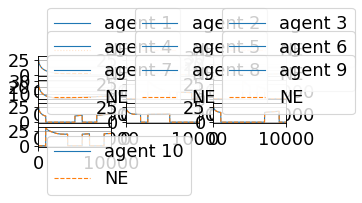

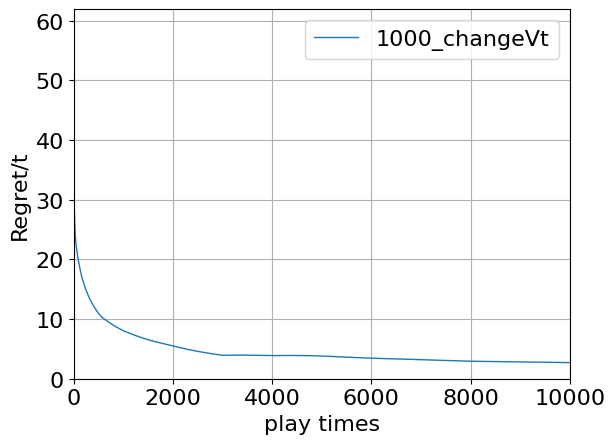

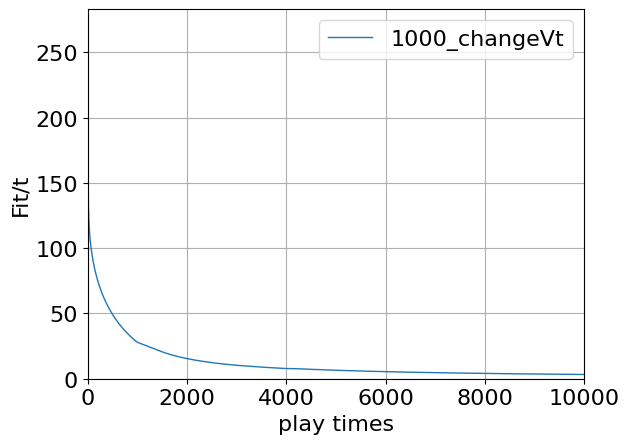

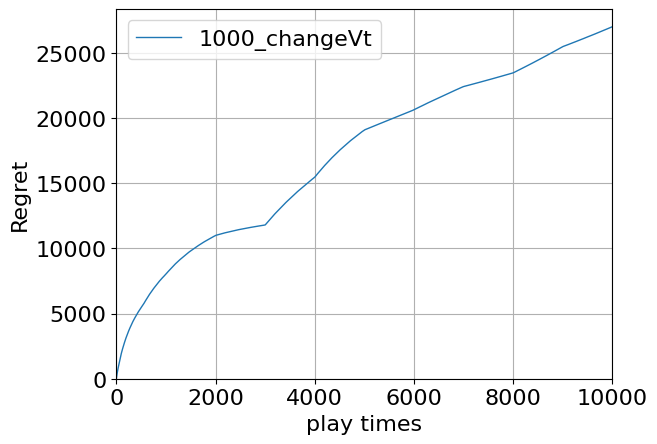

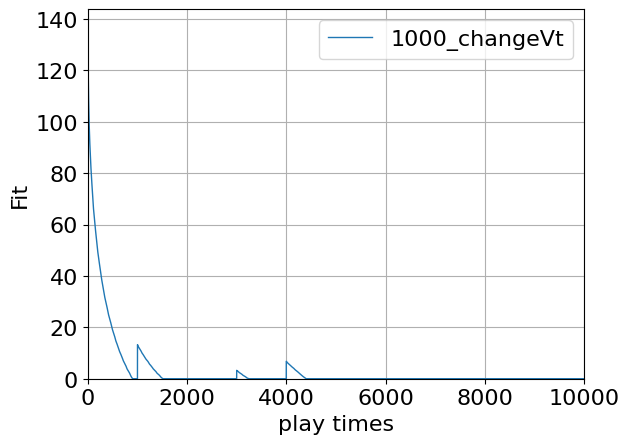

In [ ]:
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

J_gap = [] #グラフ縦軸
ttt = [] #グラフ横軸
gtnolm = []#RegcTグラフ縦軸
result_Ji = [0 for i in range(Agent_upper_limit)]
result_gi = [0 for i in range(Agent_upper_limit)]

RegT = 0
Fit_sum = 0

J_gap = [0 for i in range(Trials)]
Regret = [0 for i in range(Trials)]
ttt = [0 for i in range(Trials)]
gtnolm = [0 for i in range(Trials)]
Fit_gap = [0 for i in range(Trials)]
Fit = [0 for i in range(Trials)]
nash_xt = [[0 for i in range(Trials)]for j in range(Agent_upper_limit)]
x = [[0 for i in range(Trials)]for j in range(Agent_upper_limit)]

miss = 0
miss_t = 0

match_t = 0
match_count = 0

for t in range(0, Trials):
  print("\n")
  print("t=")
  print(t)
  print("\n")
  print("\n")
  print("Vt=")
  print(Agent)
  print("\n")
  if t % 1000 == 0:
    generate(xt_net,lamda_net,wt_net,J_min_data,xt_hat_net,l_net)
    Atmaker(Agent)
    print("Vt更新:",Agent)
    Jmin = 0
    wJ_t = 0

  #ナッシュ均衡の決定
  nash_ans(xt,t)
  for i in range(Agent_upper_limit):
    if switch[i] == 1:
      nash_xt[i][t] = nash_x[i]


  Ji_t = 0
  Ji_min_t = 0

  for i in range(Agent_upper_limit): #----------Jtを計算----------
    if switch[i] == 1:
        result_Ji[i] = nash_cost_Func(i,t,xt[i],nash_x)##時刻tにおけるエージェントiの相手が最適な選択をとると仮定したときのコスト関数の計算
        J_min[i] = nash_cost_Func(i,t,nash_x[i],nash_x)##時刻tにおけるナッシュ均衡時のコスト関数の計算
        Ji_t += result_Ji[i]
        Ji_min_t += J_min[i]
        if nash_x[i] == xt[i]:
          match_count += 1
        else:
          match_t = t

  Jmin = Ji_min_t/Agent
  wJ_t = Ji_t/Agent

  if Jmin == 0:
        Jmin = wJ_t
  elif wJ_t <= Jmin:
        Jmin = wJ_t
  if wJ_t >= Jmin:
      RegT = RegT + (wJ_t - Jmin)
  else:
      miss += 1
      miss_t = t
  print('RegT')
  print(RegT)
  J_gap[t] = RegT #グラフ作成のための値集め
  if t == 0:
    Regret[t] = RegT
  else:
    Regret[t] = RegT / float(t)

  result_g = 0
  for i in range(Agent_upper_limit):#----------gtの計算----------
    if switch[i] == 1:
      result_g += g(xt,i,t,l_net)
    else:
      result_g += 0



  if result_g < 0:
    gtnolm[t] = 0
  else:
    gtnolm[t] = result_g*result_g

  gtnolm[t] = math.sqrt(gtnolm[t])
  Fit_sum += gtnolm[t]
  if t == 0:
    Fit[t]=Fit_sum
  else:
    Fit[t] = Fit_sum/float(t)
  for i in range(Agent_upper_limit):#----------xtの更新----------
    print("各iにおける変更前のxt")
    print(xt[i])
    print('\n')

    if switch[i] == 1:
      new_x = regene_x(xt,lamda,xt_hat,t,i)

    print("各iにおける変更後のxt")
    print(xt[i])
    print('\n')

  for i in range(Agent_upper_limit):#----------xhatの計算----------
     if switch[i] == 1:
        new_x_hat(i,xt,At,Agent,xt_hat)

  for i in range(Agent_upper_limit):#----------wi(t)の計算----------
     if switch[i] == 1:
        w_it(lamda,wt,i)


  for i in range(Agent_upper_limit):#----------lamdaの更新----------

     print("各iにおける変更前のlamda")
     print(lamda[i])
     print('\n')

     if switch[i] == 1:
        new_lamda=renew_lamda(xt,t,i)

     print("各iにおける変更後のlamda")
     print(lamda[i])
     print('\n')

  for i in range(Agent_upper_limit): #----------変更を母体に反映----------
    if switch[i] == 1:
       xt_net[i] = xt[i]
       x[i][t] = xt[i]

       lamda_net[i] = lamda[i]

       wt_net[i] = wt[i]

       J_min_data[i] = J_min[i]


       for j in range(Agent_upper_limit):
          if switch[j] == 1:
              xt_hat_net[i][j] = xt_hat[i][j]



for t in range(0,Trials):
  ttt[t] = t

print("ミス：",miss,"回")
print("ミスした時間",miss_t)
print("マッチ：",match_count,"回")
print("マッチしなかった最終時間",match_t)

plt.rcParams["font.size"] = 16
fig = plt.figure(dpi = 80, figsize = (4,3))
#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax3 = fig.add_subplot(8, 3, 1)
ax4 = fig.add_subplot(8, 3, 2)
ax5 = fig.add_subplot(8, 3, 3)
ax6 = fig.add_subplot(8, 3, 4)
ax7 = fig.add_subplot(8, 3, 5)
ax8 = fig.add_subplot(8, 3, 6)
ax9 = fig.add_subplot(8, 3, 7)
ax10 = fig.add_subplot(8, 3, 8)
ax11 = fig.add_subplot(8, 3, 9)
ax12 = fig.add_subplot(8, 3, 10)

ax3.plot(ttt, x[0],  linewidth = 1, label = 'agent 1')
ax3.plot(ttt, nash_xt[0], ':',  linewidth = 1, label = 'NE')
ax3.grid()
ax3.axis(xmin = 0, xmax = Trials)
ax3.legend()


ax4.plot(ttt, x[1],  linewidth = 1, label = 'agent 2')
ax4.plot(ttt,nash_xt[1], '--',  linewidth = 1, label = 'NE')
ax4.grid()
ax4.axis(xmin=0, xmax = Trials)
ax4.legend()

ax5.plot(ttt, x[2],  linewidth = 1, label = 'agent 3')
ax5.plot(ttt,nash_xt[2], '--',  linewidth = 1, label = 'NE')
ax5.grid()
ax5.axis(xmin = 0, xmax = Trials)
ax5.legend()

ax6.plot(ttt, x[3],  linewidth = 1, label = 'agent 4')
ax6.plot(ttt,nash_xt[3], '--',  linewidth=1, label = 'NE')
ax6.grid()
ax6.axis(xmin = 0, xmax = Trials)
ax6.legend()

ax7.plot(ttt, x[4],  linewidth = 1, label = 'agent 5')
ax7.plot(ttt,nash_xt[4], '--',  linewidth = 1, label = 'NE')
ax7.grid()
ax7.axis(xmin = 0, xmax = Trials)
ax7.legend()

ax8.plot(ttt, x[5],  linewidth = 1, label = 'agent 6')
ax8.plot(ttt,nash_xt[5], '--',  linewidth = 1, label = 'NE')
ax8.grid()
ax8.axis(xmin = 0, xmax = Trials)
ax8.legend()

ax9.plot(ttt, x[6],  linewidth = 1, label = 'agent 7')
ax9.plot(ttt,nash_xt[6], '--',  linewidth = 1, label = 'NE')
ax9.grid()
ax9.axis(xmin = 0, xmax = Trials)
ax9.legend()

ax10.plot(ttt, x[7],  linewidth = 1, label = 'agent 8')
ax10.plot(ttt,nash_xt[7], '--',  linewidth = 1, label = 'NE')
ax10.grid()
ax10.axis(xmin = 0, xmax = Trials)
ax10.legend()

ax11.plot(ttt, x[8],  linewidth = 1, label = 'agent 9')
ax11.plot(ttt,nash_xt[8], '--',  linewidth = 1, label = 'NE')
ax11.grid()
ax11.axis(xmin = 0, xmax = Trials)
ax11.legend()

ax12.plot(ttt, x[9],  linewidth = 1, label = 'agent 10')
ax12.plot(ttt,nash_xt[9], '--',  linewidth = 1, label = 'NE')
ax12.grid()
ax12.axis(xmin = 0, xmax = Trials)
ax12.legend()


plt.savefig('fig1.png', bbox_inches = "tight")

#---------------------------------#

fig2 = plt.figure()
ax1 = fig2.add_subplot(1, 1, 1)

ax1.plot(ttt, Regret,  linewidth = 1, label = '1000_changeVt')
ax1.grid()
ax1.axis(xmin = 0, xmax = Trials, ymin = 0)
ax1.set_xlabel("play times")
ax1.set_ylabel("Regret/t")
ax1.legend()
plt.savefig('fig2.png', bbox_inches = "tight")

fig3 = plt.figure()
ax2 = fig3.add_subplot(1, 1, 1)
ax2.plot(ttt, Fit,  linewidth = 1, label = '1000_changeVt')
ax2.grid()
ax2.axis(xmin = 0, xmax = Trials, ymin = 0)
ax2.set_xlabel("play times")
ax2.set_ylabel("Fit/t")
ax2.legend()

plt.savefig('fig3.png', bbox_inches="tight")

#---------------------------------#
fig4 = plt.figure()
ax13 = fig4.add_subplot(1, 1, 1)
ax13.plot(ttt, J_gap,  linewidth = 1, label = '1000_changeVt')
ax13.grid()
ax13.axis(xmin = 0, xmax = Trials,ymin = 0)
ax13.set_xlabel('play times')
ax13.set_ylabel('Regret')
ax13.legend()
plt.savefig('fig4.png', bbox_inches = "tight")


fig5 = plt.figure()
ax14 = fig5.add_subplot(1, 1, 1)
ax14.plot(ttt, gtnolm,  linewidth = 1, label = '1000_changeVt')
ax14.grid()
ax14.axis(xmin = 0, xmax = Trials,ymin = 0)
ax14.set_xlabel('play times')
ax14.set_ylabel('Fit')
ax14.legend()

plt.savefig('fig5.png', bbox_inches="tight")
